In [27]:
import csv
import pandas as pd
import math
import numpy as np
import snscrape.modules.twitter as snst
from snscrape.modules.twitter import User
import re
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
nlp = spacy.load("en_core_web_md")


In [ ]:
content_data = pd.read_csv('clear_contents.csv')

In [29]:
# concept class
concept_data=pd.read_csv('concept-classes.csv')

In [30]:
concepts=list(concept_data['Id'])
contents=list(content_data['content'])

In [32]:
content_data['class_with'] = 0
content_data['class_without']=0

In [33]:
content_data

,Unnamed: 0,user_id,content,class_with,class_without
0,0,1312895255633567744,“what can i do about ” here’s answer scientist...,0,0
1,1,66780587,make every day earthday cloud globe_showing_Am...,0,0
2,2,21308602,trees do so much for our earth home see how yo...,0,0
3,3,2293415520,nearly years after his landmark article contai...,0,0
4,4,723082700991676416,this ramzan lets take a pledge to help our pla...,0,0
...,...,...,...,...,...
444,444,3045789534,let us welcome the new year with the regenerat...,0,0
445,445,78637132,just watched dontlookup i enjoyed itwatching w...,0,0
446,446,874006150399877120,the window of opportunity to save the planet i...,0,0
447,447,1371062581280960515,best decision i made was going vegan its the k...,0,0


In [34]:
# tweet analysis - sujet classification - faire ça avec utilisateur
# sujet class

class0=''
class1=''
class2=''
class3=''
for index,row in concept_data.iterrows():
    if row['modularity_class']== 0 :
        class0+=row['Id']+' '
    if row['modularity_class']== 1 :
        class1+=row['Id']+' '
    if row['modularity_class']== 2 :
        class2+=row['Id']+' '
    if row['modularity_class']== 3 :
        class3+=row['Id']+' '
classes=[class0,class1,class2,class3]

In [35]:
classes[3] 

'policy future term chapter land world report information section demand range agreement example table data adaptation model evidence '

In [55]:
classes[0]

'energy research mitigation change increase development technology reduction gas growth transport industry analysis available university energy efficiency journal sustainable development biomass '

In [45]:
content_data['content'][11]

'is one of the biggest threats facing humanity amp our home huawei rotating chairman explores how technology is fighting back for the planet techall technature earthday'

In [42]:
# similarity match
for index,row in content_data.iterrows():
    simi = []
    doc1=nlp(row['content'])
    for j in range(3):
        doc2 = nlp(classes[j])
        simi.append(doc1.similarity(doc2))
    max_value = max(simi) # Return the max value of the list.
    max_index = simi.index(max_value)
    content_data.loc[index,'class_without'] = max_index



In [43]:
content_data

,Unnamed: 0,user_id,content,class_with,class_without
0,0,1312895255633567744,“what can i do about ” here’s answer scientist...,3,2
1,1,66780587,make every day earthday cloud globe_showing_Am...,3,0
2,2,21308602,trees do so much for our earth home see how yo...,3,0
3,3,2293415520,nearly years after his landmark article contai...,3,0
4,4,723082700991676416,this ramzan lets take a pledge to help our pla...,3,0
...,...,...,...,...,...
444,444,3045789534,let us welcome the new year with the regenerat...,3,0
445,445,78637132,just watched dontlookup i enjoyed itwatching w...,3,2
446,446,874006150399877120,the window of opportunity to save the planet i...,3,2
447,447,1371062581280960515,best decision i made was going vegan its the k...,3,2


In [46]:
# tweet analysis - sentiment analysis - fair le lien à mot et aussi utilisateur
content_data['sentiment'] = ''


In [47]:
nlp.add_pipe('spacytextblob')
for index,row in content_data.iterrows():
    doc = nlp(row['content'])
    if doc._.blob.polarity > 0:
        content_data.loc[index,'sentiment'] = 'Positive'
    if doc._.blob.polarity == 0:
        content_data.loc[index,'sentiment'] = 'Neutral'
    if doc._.blob.polarity < 0:
        content_data.loc[index,'sentiment'] = 'Negative'

In [58]:
content_data.to_csv('user_analysis.csv')

In [61]:
content_data['user_name']=''

In [64]:
user_data = pd.read_csv('user_nodes.csv')

In [66]:
name_dict =  dict([(i,a) for i,a in zip(user_data['Id'], user_data['Label'])])

In [67]:
len(name_dict)

786

In [68]:
for index,row in content_data.iterrows():
    content_data.loc[index,'user_name']=name_dict[row['user_id']]

In [70]:
content_data.to_csv('user_analysis.csv')

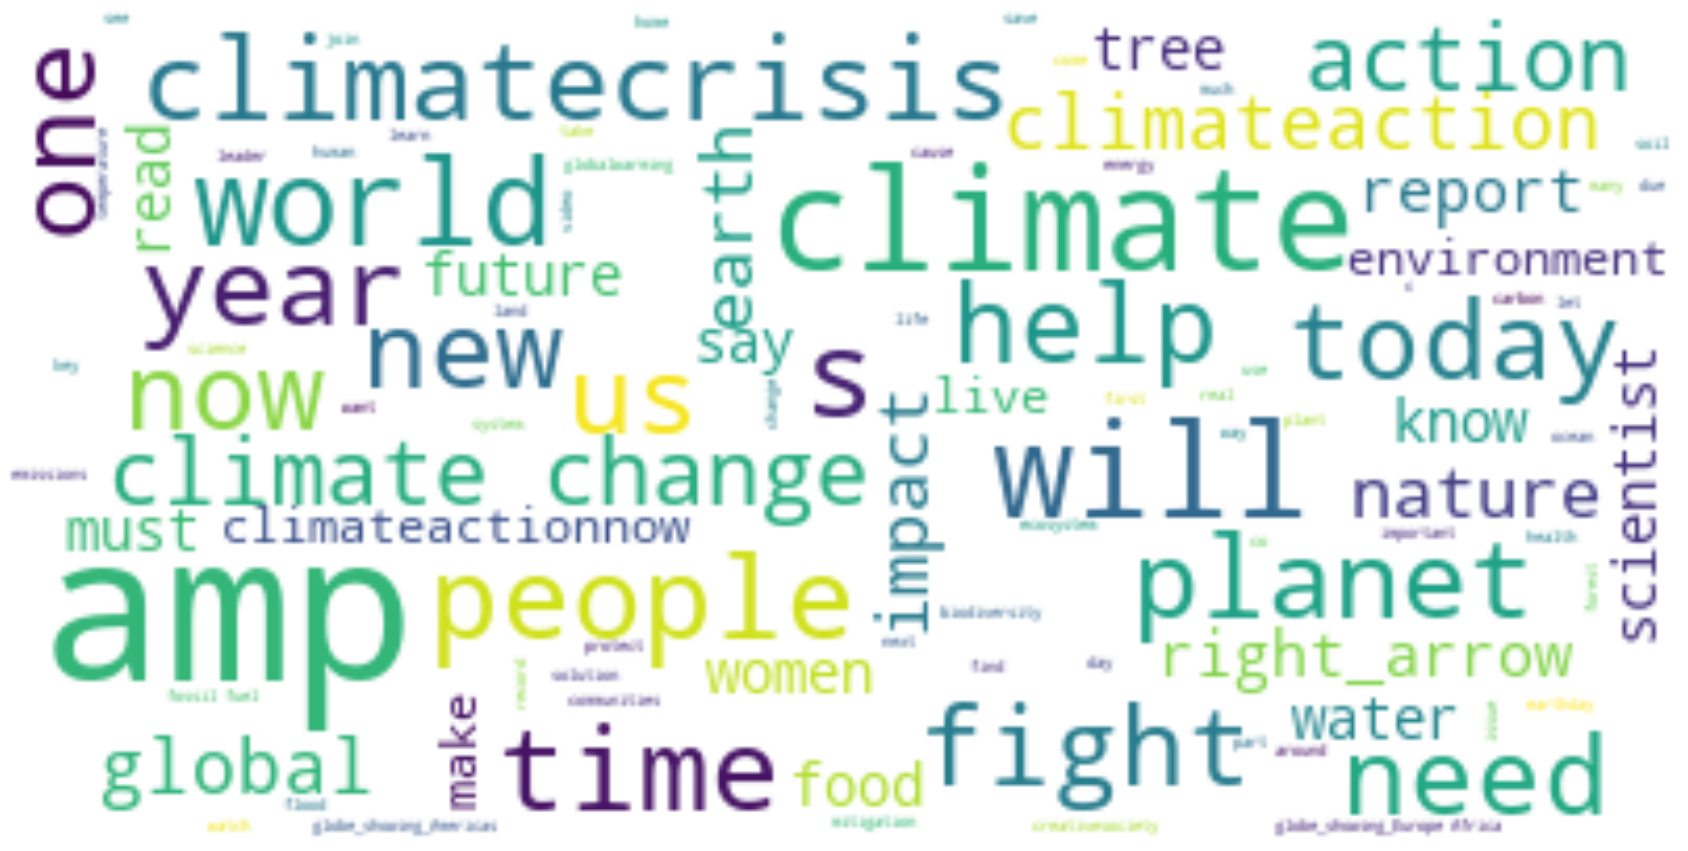

In [18]:
# Making WordClouds
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
tweet_All = " ".join(tweet for tweet in content_data['content'])
fig, ax = plt.subplots(1, 1, figsize  = (30,30))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)
# Display the generated image:
ax.imshow(wordcloud_ALL, interpolation='bilinear')
ax.axis('off')
plt.savefig('./wordcloud2.jpg')

In [19]:
tweet_All

'“what can i do about ” here’s answer scientistrebellion earthday of the most dangerous climate tipping points on the horizon threatens to turn the lush amazon rainforest into a dry savanna it would be an incalculable irreversible loss help others understand by sharing this video amazon make every day earthday cloud globe_showing_Americas seedling at aws we help our customers meaningfully reduce carbon emissions by demonstrating how intelligent systems can help build more sustainable infrastructure light_bulb earthday means celebrating successes like these cloud globe_showing_Americas green_heart see how four innovative companies use the cloud to fight in the aws original docuseries “climate next” right_arrow is our best ally in resolving climate change” — tnc’s sun deciduous_tree see how works with to help balance tree cover inequality using data in the season finale of climate next eyes television aws communities have less tree cover and are °c hotter than highincome areas sun hot_fa